# 이미지 데이터 셋을 이용한 CNN Modeling(Colab File Upload)
## Dogs and Cats Image_Data
* Train_Data : 2000(1000_Dogs, 1000_Cats)
* Valid_Data : 1000(500_Dogs, 500_Cats)
* Test_Data : 1000(500_Dogs, 500_Cats)

## Import Tensorflow & Keras

* TensorFlow Version 지정

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'1.15.0'

* GPU 설정 확인

In [0]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Fri Feb 21 00:44:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    28W /  70W |    111MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                          

* Keras Version 확인

In [0]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.5'

# I. Colab File Upload

> ## 1) 'dogs_and_cats_small.zip' 파일을 Colab에 업로드 후 진행

* 약 8분
* -rw-r--r-- 1 root root 90618980 Feb 21 01:05 dogs_and_cats_small.zip

In [0]:
!ls -l

total 88504
-rw-r--r-- 1 root root 90618980 Feb 21 01:05 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Feb  5 18:37 sample_data


> ## 2) unzip

In [0]:
!unzip dogs_and_cats_small.zip

In [0]:
!ls -l

total 88516
-rw-r--r-- 1 root root 90618980 Feb 21 01:05 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Feb  5 18:37 sample_data
drwxr-xr-x 4 root root     4096 Feb 21 01:08 test
drwxr-xr-x 4 root root     4096 Feb 21 01:08 train
drwxr-xr-x 4 root root     4096 Feb 21 01:08 validation


# II. Data Preprocessing

> ## 1) Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## 2) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 3) Test train_generator

In [0]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

> ## 2) Model Compile

* 모델 학습방법 설정

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 8분

In [0]:
Hist_dandc = model.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 60,
                                 validation_data = valid_generator,
                                 validation_steps = 50)




Epoch 1/60





100/100 [==============================] - 22s 218ms/step - loss: 0.7010 - acc: 0.5395 - val_loss: 0.6759 - val_acc: 0.5300
Epoch 2/60
100/100 [==============================] - 8s 82ms/step - loss: 0.6602 - acc: 0.5980 - val_loss: 0.6035 - val_acc: 0.6520
Epoch 3/60
100/100 [==============================] - 8s 82ms/step - loss: 0.6045 - acc: 0.6675 - val_loss: 0.7651 - val_acc: 0.6520
Epoch 4/60
100/100 [==============================] - 8s 80ms/step - loss: 0.5486 - acc: 0.7195 - val_loss: 0.7463 - val_acc: 0.6280
Epoch 5/60
100/100 [==============================] - 8s 83ms/step - loss: 0.5312 - acc: 0.7335 - val_loss: 0.6054 - val_acc: 0.7270
Epoch 6/60
100/100 [==============================] - 8s 80ms/step - loss: 0.4682 - acc: 0.7745 - val_loss: 0.5643 - val_acc: 0.7350
Epoch 7/60
100/100 [==============================] - 8s 81ms/step - loss: 0.4079 - acc: 0.8185 - val_loss: 0.5602 - val_acc: 0.7560
Epoch 8/60
100/100 [==============================] - 8s 80

> ## 4) 학습 결과 시각화

* Loss Visualization

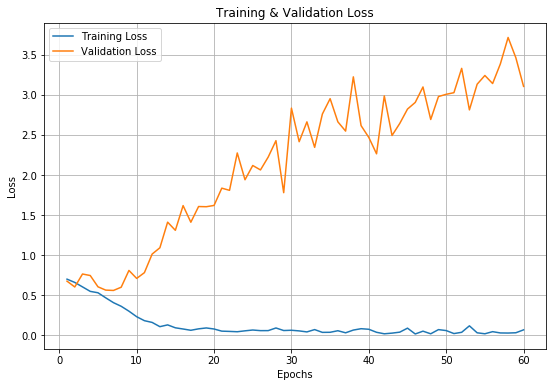

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

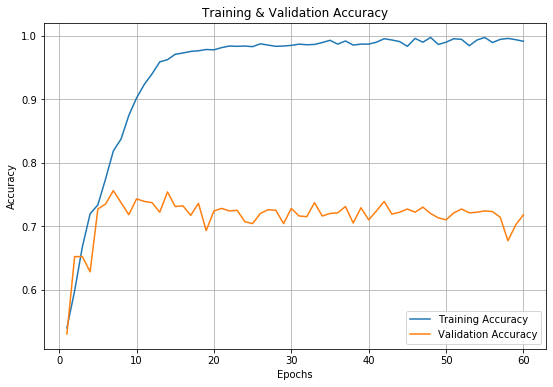

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['acc'])
plt.plot(epochs, Hist_dandc.history['val_acc'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [0]:
loss, accuracy = model.evaluate_generator(test_generator,
                                          steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 2.93916
Accuracy = 0.72600


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


> ## 2) Model Save

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [0]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 27040
-rw------- 1 root root    22464 Feb 20 01:59 001_Model_iris.h5
-rw------- 1 root root 27665728 Feb 21 01:29 002_dogs_and_cats_small.h5


> ## 3) Model Load

In [0]:
from keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [0]:
loss, accuracy = model_google.evaluate_generator(test_generator,
                                                 steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 2.93916
Accuracy = 0.72600


# 
# 
# 
# The End
# 
# 
# 